In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib 
from sklearn import metrics
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [6]:
#To simplify the ML model, dropping features that price is not heavily dependent on
df2 = df1.drop(['area_type','society','availability'],axis='columns')
df2.shape

(13320, 6)

In [7]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df2["balcony"].fillna(0,inplace=True)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [11]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
#Since Bedroom and BHK mean the same, to make data uniform, we introduce a new column "bhk"
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [14]:
df3 = df3.drop(["size"], axis="columns")
df3.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [15]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
#Since there is a range of values and values with different units present in total_sqft column, this column needs to be cleaned
def calculatesqft(x):
    tokens = x.split('-') #We take the mean wherever a range of values are present and if single value present, returning it as it is
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except: #If any other unit than sq ft  present, then returning NaN
        return None

In [17]:
df4= df3.copy()
df4.total_sqft = df4.total_sqft.apply(calculatesqft)
df4.dropna(inplace=True) #Dropping all the NaN values
df4.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [18]:
df4.shape

(13200, 6)

In [19]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

Whitefield                                  533
Sarjapur  Road                              392
Electronic City                             304
Kanakpura Road                              264
Thanisandra                                 235
Yelahanka                                   210
Uttarahalli                                 186
Hebbal                                      176
Marathahalli                                175
Raja Rajeshwari Nagar                       171
Bannerghatta Road                           151
Hennur Road                                 150
7th Phase JP Nagar                          148
Haralur Road                                141
Electronic City Phase II                    131
Rajaji Nagar                                106
Chandapura                                   98
Bellandur                                    96
Hoodi                                        88
KR Puram                                     88
Electronics City Phase 1                

In [20]:
len(location_stats)

1287

In [21]:
len(location_stats[location_stats>30])

96

In [22]:
len(location_stats[location_stats<=30])

1191

In [28]:
#To reduce number of locations we apply dimensionality reduction technique
location_stats_less_than_30 = location_stats[location_stats<=30]
location_stats_less_than_30

Doddathoguru                                30
Chikkalasandra                              30
Kumaraswami Layout                          30
Ananth Nagar                                30
Kudlu                                       29
BTM 2nd Stage                               29
Dodda Nekkundi                              29
Kammasandra                                 29
Somasundara Palya                           28
Horamavu Banaswadi                          28
Padmanabhanagar                             28
Anandapura                                  27
Banashankari Stage III                      27
Ambalipura                                  27
Kodichikkanahalli                           27
Singasandra                                 27
Gubbalala                                   26
Choodasandra                                26
Kothannur                                   26
Bommasandra Industrial Area                 26
Margondanahalli                             26
Iblur Village

In [29]:
df5=df4.copy()
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_30 else x)
len(df5.location.unique())

97

In [30]:
df5.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,other,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,other,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [31]:
location_stats_less_than_30.values.sum()

5464

In [32]:
df5.shape

(13200, 6)

In [33]:
df5[df5.total_sqft/df5.bhk<400].head()

,location,total_sqft,bath,balcony,price,bhk
9,other,1020.0,6.0,0.0,370.0,6
16,Bisuvanahalli,1180.0,3.0,2.0,48.0,3
26,Electronic City,660.0,1.0,1.0,23.1,2
29,Electronic City,1025.0,2.0,1.0,47.0,3
31,Bisuvanahalli,1075.0,2.0,1.0,35.0,3


In [34]:
df5["per_room_sqft"]= df5["total_sqft"]/df5.bhk
df5.head()

,location,total_sqft,bath,balcony,price,bhk,per_room_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,528.0
1,other,2600.0,5.0,3.0,120.00,4,650.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,480.0
3,other,1521.0,3.0,1.0,95.00,3,507.0
4,Kothanur,1200.0,2.0,1.0,51.00,2,600.0


In [35]:
df5[df5["per_room_sqft"]<400].head()

,location,total_sqft,bath,balcony,price,bhk,per_room_sqft
9,other,1020.0,6.0,0.0,370.0,6,170.000000
16,Bisuvanahalli,1180.0,3.0,2.0,48.0,3,393.333333
26,Electronic City,660.0,1.0,1.0,23.1,2,330.000000
29,Electronic City,1025.0,2.0,1.0,47.0,3,341.666667
31,Bisuvanahalli,1075.0,2.0,1.0,35.0,3,358.333333


In [36]:
df5[df5["per_room_sqft"]<400].shape

(1489, 7)

In [37]:
df6 = df5[df5["per_room_sqft"]>=400]
df6.head()

,location,total_sqft,bath,balcony,price,bhk,per_room_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,528.0
1,other,2600.0,5.0,3.0,120.00,4,650.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,480.0
3,other,1521.0,3.0,1.0,95.00,3,507.0
4,Kothanur,1200.0,2.0,1.0,51.00,2,600.0


In [38]:
df6.shape

(11711, 7)

In [39]:
df6.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  6.,  7.,  8.,  9., 12., 16., 10., 13.])

In [40]:
#It is unrealistic to have more baths than number of bedrooms, hence dropping such records
df7 = df6[df6.bath <= df6.bhk+1]
df7.shape

(11565, 7)

In [41]:
df7["price_per_sqft"] = df7["price"]*100000/df7["total_sqft"]
df7.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,location,total_sqft,bath,balcony,price,bhk,per_room_sqft,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,528.0,3699.810606
1,other,2600.0,5.0,3.0,120.00,4,650.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,480.0,4305.555556
3,other,1521.0,3.0,1.0,95.00,3,507.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,600.0,4250.000000


In [42]:
df7.price_per_sqft.describe()

count     11565.000000
mean       6119.789286
std        3890.559410
min         267.829813
25%        4200.000000
50%        5252.525253
75%        6750.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [43]:
df8 = df7[df7.price_per_sqft>=3500]
df8.shape

(10424, 8)

In [44]:
df9 = df8[df8.price_per_sqft<=9000]
df9.shape

(9206, 8)

In [45]:
df10 = df9.drop(['per_room_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,other,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,other,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


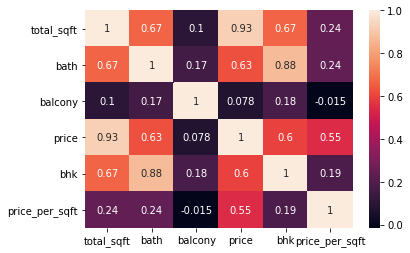

In [46]:
sns.heatmap(df10.corr(),annot=True)

In [47]:
#Since dependency of price on balcony is 0.078, which is negligible, we drop the column
df11 = df10.drop(['balcony'], axis="columns")
df11.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,other,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,other,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [48]:
dummies = pd.get_dummies(df11.location)
dummies.head(3)

,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Ambedkar Nagar,Anekal,Attibele,Balagere,Banashankari,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [49]:
df12 = pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df12.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,other,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,other,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df12.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,other,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,other,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df13 = df12.drop(['location'], axis="columns")
df13.head()

,total_sqft,bath,price,bhk,price_per_sqft,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df13.shape

(9206, 101)

# Data Cleaning is done. Now we will build a prediction model.

In [53]:
#Since price is dependent variable, we drop it for X
X = df13.drop(['price'],axis="columns")
X.shape

(9206, 100)

In [54]:
#y = price since price is dependent
y = df13.price
y.shape

(9206,)

In [55]:
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [57]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_train)
y_test_pred = lr_clf.predict(X_test)
acc_linreg = metrics.r2_score(y_test, y_test_pred)
lr_clf.score(X_test,y_test)

0.9754307012445826

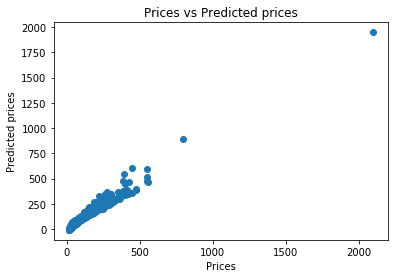

In [58]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [59]:
X.head()

,total_sqft,bath,bhk,price_per_sqft,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1056.0,2.0,2,3699.810606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4,4615.384615,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,4305.555556,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,6245.890861,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,4250.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X.columns

Index(['total_sqft', 'bath', 'bhk', 'price_per_sqft', '5th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'Akshaya Nagar', 'Ambedkar Nagar', 'Anekal', 'Attibele', 'Balagere',
       'Banashankari', 'Bannerghatta Road', 'Basavangudi', 'Begur Road',
       'Bellandur', 'Bhoganhalli', 'Bisuvanahalli', 'Bommanahalli',
       'Bommasandra', 'Brookefield', 'Budigere', 'CV Raman Nagar',
       'Chandapura', 'Channasandra', 'Devanahalli', 'Electronic City',
       'Electronic City Phase II', 'Electronics City Phase 1', 'Frazer Town',
       'Gottigere', 'Green Glen Layout', 'HSR Layout', 'Haralur Road',
       'Harlur', 'Hebbal', 'Hebbal Kempapura', 'Hegde Nagar', 'Hennur',
       'Hennur Road', 'Hoodi', 'Horamavu Agara', 'Hormavu', 'Hosa Road',
       'Hosakerehalli', 'Hosur Road', 'Hulimavu', 'Indira Nagar', 'JP Nagar',
       'Jakkur', 'Jalahalli', 'Jigani', 'KR Puram', 'Kadugodi',
       'Kaggadasapura', 'Kalena Agrahara', 'Kanakapura', 'Ka

In [61]:
np.where(X.columns=='5th Phase JP Nagar')[0][0]

4

In [64]:
X.columns

Index(['total_sqft', 'bath', 'bhk', 'price_per_sqft', '5th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'Akshaya Nagar', 'Ambedkar Nagar', 'Anekal', 'Attibele', 'Balagere',
       'Banashankari', 'Bannerghatta Road', 'Basavangudi', 'Begur Road',
       'Bellandur', 'Bhoganhalli', 'Bisuvanahalli', 'Bommanahalli',
       'Bommasandra', 'Brookefield', 'Budigere', 'CV Raman Nagar',
       'Chandapura', 'Channasandra', 'Devanahalli', 'Electronic City',
       'Electronic City Phase II', 'Electronics City Phase 1', 'Frazer Town',
       'Gottigere', 'Green Glen Layout', 'HSR Layout', 'Haralur Road',
       'Harlur', 'Hebbal', 'Hebbal Kempapura', 'Hegde Nagar', 'Hennur',
       'Hennur Road', 'Hoodi', 'Horamavu Agara', 'Hormavu', 'Hosa Road',
       'Hosakerehalli', 'Hosur Road', 'Hulimavu', 'Indira Nagar', 'JP Nagar',
       'Jakkur', 'Jalahalli', 'Jigani', 'KR Puram', 'Kadugodi',
       'Kaggadasapura', 'Kalena Agrahara', 'Kanakapura', 'Ka

In [63]:
def predict_price(location,sqft,bath,bhk):  
    for eloca in location:
        loc_index = np.where(X.columns==eloca)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [240]:
predict_price("5th Phase JP Nagar",1000, 3, 3)

43.101398450660184

In [243]:
predict_price("Indira Nagar",1000, 2, 2)

86.32230971184268

In [244]:
import pickle

In [245]:
with open('Bengaluru_House_Prediction.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [247]:
dfx=pd.read_csv("testingnow.csv")
dfx.head()


,Location,Sqft,Bath,BHK
0,5th Phase JP Nagar,1000,3,3


In [252]:
dfx["predicted_price"] = predict_price(dfx.Location[0],dfx.Sqft[0],dfx.Bath[0],dfx.BHK[0])
dfx.head()

,Location,Sqft,Bath,BHK,predicted_price
0,5th Phase JP Nagar,1000,3,3,43.101398
